# Coordinate systems
When working with 3D image data, we often speak about X, Y and Z. When describing image dimensions. Depending on which software one works with, these dimensions are specified a bit differently. This notebook gives an overview about two different ways established in the field. We will call the two systems the "_ZYX_ system" and the "_012_ system". Python libraries such as numpy and scipy follow the _012_ system. Software such as ImageJ, CLIJ and clesperanto follow the _ZYX_ system.

We start by opening a 3D image stack.

In [1]:
import numpy as np
from skimage.io import imread
import scipy.ndimage as ndi
import pyclesperanto_prototype as cle
from scipy.linalg import inv

In [2]:
image = imread('../../data/Haase_MRT_tfl3d1.tif')

image.shape

(192, 256, 256)

This image has a shape of (192, 256, 256). These numbers are sorted according to the 012 system, which does not define terms such as "width", "height" and "depth". In the ZYX-system, this image stack has 192 slices. Each of these slices is 256 pixels high and 256 pixels wide. Hence, the ZYX-system interprets the numbers printed above in the opposite order.

We will now extract a Z-slice from the 3D dataset and visualize it. In the 012-system, we take slice from the stack in the first (index 0) dimension. It has slice-position Z=100 (ZYX-system) or position 100 along dimension 0 (012 system). 

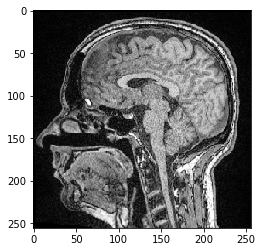

In [3]:
slice = image[100]

cle.imshow(slice)

## Translating images
To explain the difference between the coordinate systems a bit more, we will now use an affine transform matrix to translate the image. We will translate it by 100 pixels in Y-direction (ZYX-system), also known as dimension 1  (012-system) and -50 pixels in X-direction, a.k.a. the dimension 2. 

In [4]:
tz = 0
ty = 100
tx = -50

t0 = 0
t1 = 100
t2 = -50

If you are no familiar with affine transform matrices yet, [this wikipedia article](https://en.wikipedia.org/wiki/Affine_transformation#Image_transformation) gives a great overview.

### Translating images using clesperanto
clesperanto follows the ZYX-system, and affine transform matrices are typically written in the following form. Please note that in the so called ZYX-system the translation vector reads x-y-z from the top to the bottom.

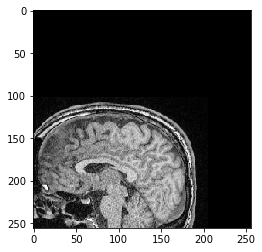

In [5]:
matrix = np.asarray([
 [1, 0, 0, tx],
 [0, 1, 0, ty],
 [0, 0, 1, tz],
 [0, 0, 0, 1],
])

cle_transformed = cle.affine_transform(image, transform=matrix)

cle.imshow(cle_transformed[100])

### Translating images using scipy
In scipy, which follows the 012-system and hence, the transform looks like this:

In [6]:
matrix = np.asarray([
 [1, 0, 0, t0],
 [0, 1, 0, t1],
 [0, 0, 1, t2],
 [0, 0, 0, 1],
])

Note that the affine_transform function in scipy expects a transform that describes the transformation from the output image to the source image. This is the inverse of the defined transform matrix above. Hence, we call `inv()` to invert the matrix. This is very common in software that applies affine transforms. It technically makes sense, even though it might not be the most intuitive way of working with transforms.

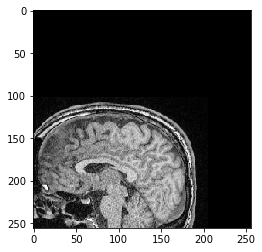

In [7]:
scipy_transformed = ndi.affine_transform(image, inv(matrix))

cle.imshow(scipy_transformed[100])

## Keep it simple
To keep affine transforms and coordinate systems easy to use, we have an `AffineTransform3D` class in clesperanto that will manage transform matrices for us and we don't have to think about them anymore. We just need to keep in mind that X goes from left to right, Y goes from top to bottom and Z from front to back in our image stack.

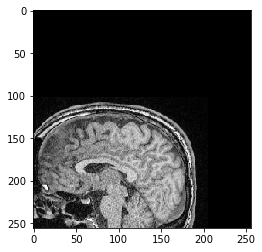

In [8]:
transform = cle.AffineTransform3D()
transform.translate(
    translate_x=tx,
    translate_y=ty,
    translate_z=tz
)

cle_translated2 = cle.affine_transform(image, transform=transform)

cle.imshow(cle_translated2[100])

The same also works with scaling and rotations.

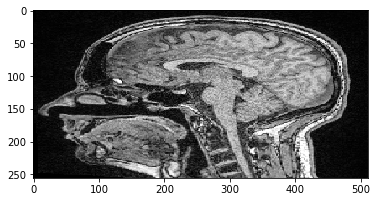

In [9]:
scale_factor = 2

transform = cle.AffineTransform3D()
transform.scale(scale_x=scale_factor)

cle_translated2 = cle.affine_transform(image, transform=transform, auto_size=True)

cle.imshow(cle_translated2[100])

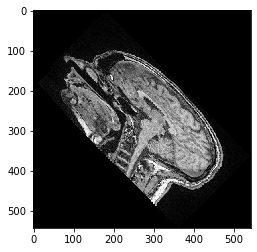

In [10]:
scale_factor = 2
rotation_angle = 45

transform = cle.AffineTransform3D()

transform.scale(scale_x=scale_factor)
transform.rotate_around_z_axis(rotation_angle)

cle_translated2 = cle.affine_transform(image, transform=transform, auto_size=True)

cle.imshow(cle_translated2[100])

Note: If you scale first and rotate after, or if you rotate first and scale after makes a difference:

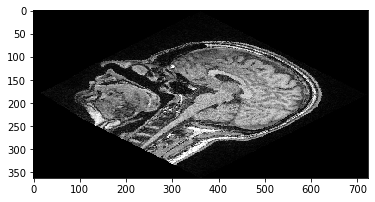

In [11]:
transform = cle.AffineTransform3D()

transform.rotate_around_z_axis(rotation_angle)
transform.scale(scale_x=scale_factor)

cle_translated2 = cle.affine_transform(image, transform=transform, auto_size=True)

cle.imshow(cle_translated2[100])